In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [116]:
#print(pd.__version__)

In [198]:
# read file to make dataset
from library.common import Core
year = 2018
core = Core()
df = core.get_cluster_data(year)

# for using contries only, not world data
df_con = df[df['iso_code']!='WLD'] 
df_con.head()

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,medium_to_high_tech_gdp,industrial_gdp,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent
75,AFG,2018,8.345,0.000,0.000,0.00,3.849,0.057,0.000,0.293,...,5.975596e+07,2.457079e+09,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00
168,ALB,2018,4.734,5.806,1.072,0.00,0.473,0.780,0.000,0.150,...,4.292021e+07,3.223896e+09,115.114239,44.050074,0.0,0.0,0.0,0.0,0.216341,32.63
277,DZA,2018,161.487,0.000,0.000,0.24,1.330,10.749,5.598,88.887,...,2.002730e+08,6.865545e+10,2478.060305,4.790090,0.0,0.0,0.0,0.0,0.336292,23.63
306,AND,2018,0.495,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00
382,AGO,2018,24.376,0.000,0.000,0.00,0.000,1.937,7.867,1.608,...,2.095844e+08,4.858017e+10,666.906455,378.706162,0.0,0.0,0.0,0.0,0.143503,0.00


## Find the optimal K for clustering

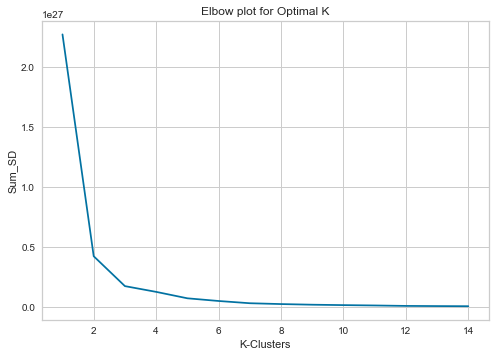

In [199]:
# To find optimal K using elbow plot

df_feature = df_con.iloc[:, 2:]
sum_of_sqr_distance = []
k_range = range(1, 15)
for k in k_range:
    km_model1 = KMeans(n_clusters=k)
    km_model1.fit(df_feature)
    sum_of_sqr_distance.append(km_model1.inertia_)

plt.plot(k_range, sum_of_sqr_distance)
plt.xlabel('K-Clusters')
plt.ylabel('Sum_SD')
plt.title("Elbow plot for Optimal K")
plt.show()

To see the elbow plot, we assume that one of 2, 3 is the optimal value of k for clustering.

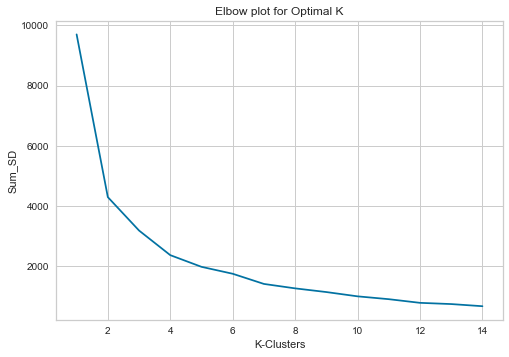

In [200]:
# To find optimized k using elbow for scaled features
df_feature = df_con.iloc[:, 2:]
sum_of_sqr_distance = []
k_range = range(1, 15)
for k in k_range:
    km_model2 = KMeans(n_clusters=k)
    x_scaled = StandardScaler().fit_transform(df_feature)
    km_model2.fit(x_scaled)
    sum_of_sqr_distance.append(km_model2.inertia_)

plt.plot(k_range, sum_of_sqr_distance)
plt.xlabel('K-Clusters')
plt.ylabel('Sum_SD')
plt.title("Elbow plot for Optimal K")
plt.show()

To see the elbow plot of scaled feature, we assume that one of 2, 3, 4 is the optimal value of k for clustering

In [201]:
from sklearn.metrics import silhouette_samples, silhouette_score
df_feature = df_con.iloc[:, 2:]
# using silhuette methods for finding optimal K of features
range_n_clusters = [2,3,4,5,6]
for n_clusters in range_n_clusters:
    km_model3 = KMeans(n_clusters = n_clusters)
    preds = km_model3.fit_predict(df_feature)
    centers = km_model3.cluster_centers_
    
    score = silhouette_score(df_feature, preds)
    print('For n_clusters = {}, silhuette score is {}'.format(n_clusters, score))

For n_clusters = 2, silhuette score is 0.9677522099072814
For n_clusters = 3, silhuette score is 0.8703225324776473
For n_clusters = 4, silhuette score is 0.8428644012969968
For n_clusters = 5, silhuette score is 0.8378187005301369
For n_clusters = 6, silhuette score is 0.7427224498941752


In [202]:
# using silhuette methods for finding optimal K of scaled features
df_feature = df_con.iloc[:, 2:]
range_n_clusters = [2,3,4,5,6]
for n_clusters in range_n_clusters:
    km_model4 = KMeans(n_clusters = n_clusters)
    x_scaled = StandardScaler().fit_transform(df_feature)

    preds = km_model4.fit_predict(x_scaled)
    centers = km_model4.cluster_centers_
    
    score = silhouette_score(x_scaled, preds)
    print('For n_clusters = {}, silhuette score is {}'.format(n_clusters, score))

For n_clusters = 2, silhuette score is 0.9186151077657402
For n_clusters = 3, silhuette score is 0.9014554980082118
For n_clusters = 4, silhuette score is 0.558588357571998
For n_clusters = 5, silhuette score is 0.3593246237536715
For n_clusters = 6, silhuette score is 0.3510009943337757


In [203]:
# to get optimal k value, use yellowbrick method
#from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.cluster import KElbowVisualizer

df_feature = df_con.iloc[:, 2:]

def yellow_vis(df_feature, min, max):
    x = df_feature
#    scale_x = StandardScaler().fit_transform(x) 
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(min, max))
    vis1 = visualizer.fit(x)
#    vis2 = visualizer.fit(scale_x)
    
    vis1
#    vis2

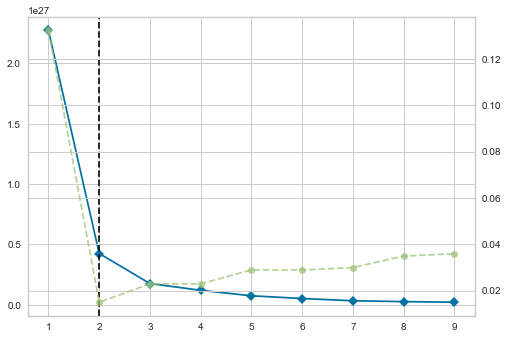

In [204]:
yellow_vis(df_feature, 1, 10)

In [205]:
df_feature = df_con.iloc[:, 2:]

def yellow_vis(df_feature, min, max):
    x = df_feature
    scale_x = StandardScaler().fit_transform(x) 
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(min, max))
#    vis1 = visualizer.fit(x)
    vis2 = visualizer.fit(scale_x)
    
#    vis1
    vis2

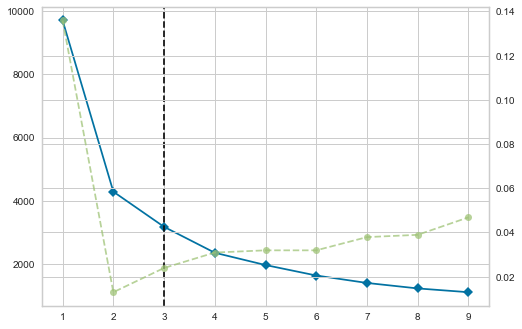

In [206]:
yellow_vis(df_feature, 1, 10)

The blue line is an indicator of the group's volatility. As the number of clusters increases from 1 to 2, the volatility decreases sharply, but after the number of clusters increases, the volatility is decreasing. The vertical dotted line also indicates the optimal number of clusters. Therefore, three clusters are best.

The green dotted line is the time it took to train the cluster. It takes less time when clusters 2 and 3. This means that training takes less time when clustering is good.

The result of best k value for clustering is different bewteen silhouette_score(k=2) and yellowbrick(k=3) 

In [207]:
# Create kmeans func to cluster countries by features and add the result column to dataframe

def kmeans(k, df_feature):
    

    km1 = KMeans(n_clusters = k)
    km2 = KMeans(n_clusters = k)
    
    xfeatures = df_feature
    x_scaled = StandardScaler().fit_transform(xfeatures)
    
    clusters = km1.fit_predict(xfeatures)
    new_clusters = km2.fit_predict(x_scaled)
#    print('cluster_center:', km1.cluster_centers_)
#    print('scaled cluster_center:', km2.cluster_centers_)
    
    df_result = df_con.copy()
    
    df_result['cluster_label'] = clusters
    df_result['cluster_scaled_label'] = new_clusters
    
    return df_result

In [208]:
# first, input k value 2 from silhouette_score
df_feature = df_con.iloc[:, 2:]

k = 2
df_clustering = kmeans(k, df_feature)
print(df_clustering['cluster_label'].value_counts())
print(df_clustering['cluster_scaled_label'].value_counts())

0    229
1      2
Name: cluster_label, dtype: int64
0    229
1      2
Name: cluster_scaled_label, dtype: int64


In [209]:
df_clustering[df_clustering['cluster_scaled_label'] == 1]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
4088,CHN,2018,10289.990,9285.067,-1004.922,0.273,7316.400,786.745,0.000,519.834,...,135736.14900,12931.937440,84313.94298,26742.51511,7109823.853,1832838.205,0.240148,8.35,1,1
20106,USA,2018,5375.491,5726.611,351.120,0.202,1283.532,38.971,71.008,1641.041,...,92789.24944,7403.794459,13426.29193,41484.76809,4433935.757,743178.772,0.113073,9.47,1,1


In [210]:
df_clustering[df_clustering['cluster_scaled_label'] == 0]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
75,AFG,2018,8.345,0.000,0.000,0.00,3.849,0.057,0.000,0.293,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
168,ALB,2018,4.734,5.806,1.072,0.00,0.473,0.780,0.000,0.150,...,115.114239,44.050074,0.0,0.0,0.0,0.0,0.216341,32.63,0,0
277,DZA,2018,161.487,0.000,0.000,0.24,1.330,10.749,5.598,88.887,...,2478.060305,4.790090,0.0,0.0,0.0,0.0,0.336292,23.63,0,0
306,AND,2018,0.495,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
382,AGO,2018,24.376,0.000,0.000,0.00,0.000,1.937,7.867,1.608,...,666.906455,378.706162,0.0,0.0,0.0,0.0,0.143503,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23108,MCO,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23109,MNP,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23110,SMR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23111,VIR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0


In [211]:
df_clustering[df_clustering['cluster_label'] == 1]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
4088,CHN,2018,10289.990,9285.067,-1004.922,0.273,7316.400,786.745,0.000,519.834,...,135736.14900,12931.937440,84313.94298,26742.51511,7109823.853,1832838.205,0.240148,8.35,1,1
20106,USA,2018,5375.491,5726.611,351.120,0.202,1283.532,38.971,71.008,1641.041,...,92789.24944,7403.794459,13426.29193,41484.76809,4433935.757,743178.772,0.113073,9.47,1,1


In [216]:
df_clustering[df_clustering['cluster_label'] == 0]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
75,AFG,2018,8.345,0.000,0.000,0.00,3.849,0.057,0.000,0.293,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
168,ALB,2018,4.734,5.806,1.072,0.00,0.473,0.780,0.000,0.150,...,115.114239,44.050074,0.0,0.0,0.0,0.0,0.216341,32.63,0,0
277,DZA,2018,161.487,0.000,0.000,0.24,1.330,10.749,5.598,88.887,...,2478.060305,4.790090,0.0,0.0,0.0,0.0,0.336292,23.63,0,0
306,AND,2018,0.495,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
382,AGO,2018,24.376,0.000,0.000,0.00,0.000,1.937,7.867,1.608,...,666.906455,378.706162,0.0,0.0,0.0,0.0,0.143503,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23108,MCO,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23109,MNP,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23110,SMR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23111,VIR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0


In [217]:
# Next, input k value 3 from yellowbrick
df_feature = df_con.iloc[:, 2:]

k = 3
df_clustering = kmeans(k, df_feature)
print(df_clustering['cluster_label'].value_counts())
print(df_clustering['cluster_scaled_label'].value_counts())

0    216
2     13
1      2
Name: cluster_label, dtype: int64
0    229
1      1
2      1
Name: cluster_scaled_label, dtype: int64


In [218]:
df_clustering[df_clustering['cluster_scaled_label'] == 1]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
4088,CHN,2018,10289.99,9285.067,-1004.922,0.273,7316.4,786.745,0.0,519.834,...,135736.149,12931.93744,84313.94298,26742.51511,7109823.853,1832838.205,0.240148,8.35,1,1


In [219]:
df_clustering[df_clustering['cluster_scaled_label'] == 0]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
75,AFG,2018,8.345,0.000,0.000,0.00,3.849,0.057,0.000,0.293,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
168,ALB,2018,4.734,5.806,1.072,0.00,0.473,0.780,0.000,0.150,...,115.114239,44.050074,0.0,0.0,0.0,0.0,0.216341,32.63,0,0
277,DZA,2018,161.487,0.000,0.000,0.24,1.330,10.749,5.598,88.887,...,2478.060305,4.790090,0.0,0.0,0.0,0.0,0.336292,23.63,0,0
306,AND,2018,0.495,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
382,AGO,2018,24.376,0.000,0.000,0.00,0.000,1.937,7.867,1.608,...,666.906455,378.706162,0.0,0.0,0.0,0.0,0.143503,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23108,MCO,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23109,MNP,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23110,SMR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23111,VIR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0


In [220]:
df_clustering[df_clustering['cluster_label'] == 1]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
4088,CHN,2018,10289.990,9285.067,-1004.922,0.273,7316.400,786.745,0.000,519.834,...,135736.14900,12931.937440,84313.94298,26742.51511,7109823.853,1832838.205,0.240148,8.35,1,1
20106,USA,2018,5375.491,5726.611,351.120,0.202,1283.532,38.971,71.008,1641.041,...,92789.24944,7403.794459,13426.29193,41484.76809,4433935.757,743178.772,0.113073,9.47,1,2


In [221]:
df_clustering[df_clustering['cluster_label'] == 0]

,iso_code,year,co2,consumption_co2,trade_co2,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,...,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,energy_intensity,percent_of_environment_patent,cluster_label,cluster_scaled_label
75,AFG,2018,8.345,0.000,0.000,0.00,3.849,0.057,0.000,0.293,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
168,ALB,2018,4.734,5.806,1.072,0.00,0.473,0.780,0.000,0.150,...,115.114239,44.050074,0.0,0.0,0.0,0.0,0.216341,32.63,0,0
277,DZA,2018,161.487,0.000,0.000,0.24,1.330,10.749,5.598,88.887,...,2478.060305,4.790090,0.0,0.0,0.0,0.0,0.336292,23.63,0,0
306,AND,2018,0.495,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
382,AGO,2018,24.376,0.000,0.000,0.00,0.000,1.937,7.867,1.608,...,666.906455,378.706162,0.0,0.0,0.0,0.0,0.143503,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23108,MCO,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23109,MNP,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23110,SMR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
23111,VIR,2018,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0,0
